In [ ]:
%matplotlib inline

#Import Pandas, Numpy, Seaborn and Pyplot libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load Boston data
from sklearn.datasets import load_boston
boston = load_boston()

print(boston.DESCR)
print(boston.keys())

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
#type(boston.data) => numpy.ndarray

#Convert Boston Numpy Array data to DataFrame and add target values n=in same dataframe
boston_data = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_data['MEDV'] = boston.target


In [ ]:
#View first 5 rows of data
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#View last 5 rows of data
boston_data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [ ]:
#Check the count of null values in dataframe
boston_data.isnull().sum()

#Inference: Target value is normally distrubuted with very few outliers

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


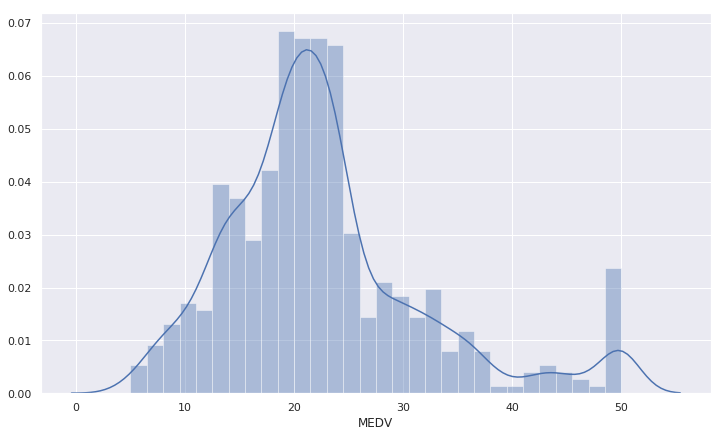

In [ ]:
# Plot distribution graph for target value 'MEDV'
sns.set(rc={'figure.figsize':(12,7)})
sns.distplot(boston_data['MEDV'], bins=30)
plt.show()

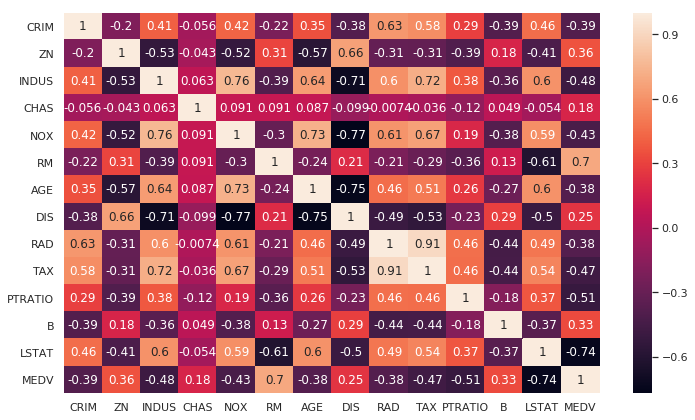

In [ ]:
#Plot heatmap for all correlations in the data
sns.heatmap(data=boston_data.corr(),annot=True)

#It is observed that target MEDV is highly correlated with LSTAT and RM features.
#Also it is observed some of the features are correlated with each other for e.g.(AGE & DS), (RAD & tax)
# Inter correlated features are not considered because it is diffult to infer target value is correlated with which of the one.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


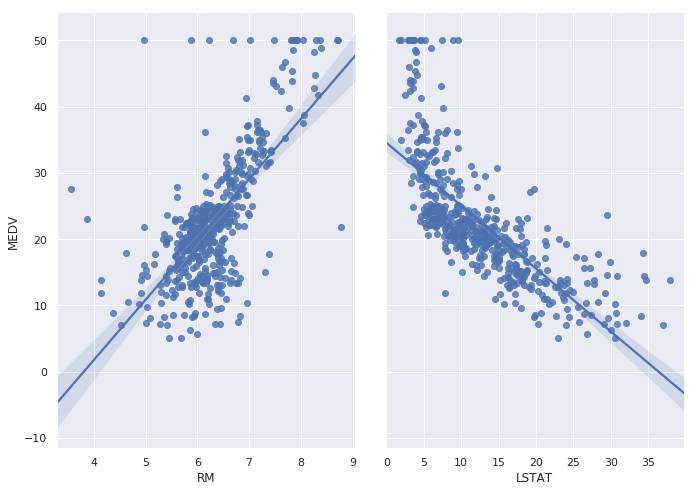

In [ ]:
# visualize the relationship between the selected features(RM, LSTAT) and the response(MEDV) using scatterplots
sns.pairplot(boston_data, x_vars=['RM','LSTAT'], y_vars='MEDV', size=7, aspect=0.7, kind='reg')

#It is observed that MEDV has linear relationship between these 2 features.
# MEDV & RM has positive linear relationship
# MEDV & LM has negative linear relationship

In [ ]:
#Model is built using Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Features selected
features = ['RM','LSTAT']

x = boston_data[features]
y = boston_data['MEDV']

#Split the the data in 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,shuffle=True)

#Print shapes
print("X_train shape : ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

linreg = LinearRegression()
linreg.fit(X_train,y_train)

#Print Intercept value
print("Intercept :: ", linreg.intercept_)

#Print Linear Coefficient for each feature
print("Coefficients :: ",list(zip(features,linreg.coef_)))

X_train shape :  (404, 2)
X_test shape:  (102, 2)
y_train shape:  (404,)
y_test shape:  (102,)
Intercept ::  -2.7689270797492007
Coefficients ::  [('RM', 5.205678864010008), ('LSTAT', -0.5867170780401668)]


In [ ]:
#Calculate Root Mean Square Error

y_predict = linreg.predict(X_test)
print(np.sqrt(metrics.mean_absolute_error(y_test, y_predict)))


1.9935326452798534
